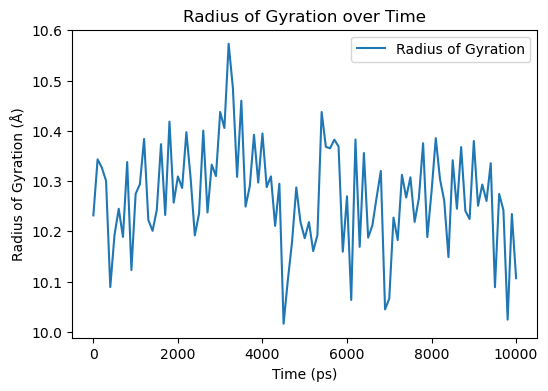

In [1]:
# Import necessary libraries
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files
u = mda.Universe("protein_only.tpr", "protein_only.xtc")

# Select protein atoms
protein = u.select_atoms("protein")

# Function to calculate radius of gyration
def calc_rg(universe, atomgroup):
    rg_values = []
    times = []
    for ts in universe.trajectory:
        rg = atomgroup.radius_of_gyration()
        rg_values.append(rg)
        times.append(ts.time)
    return np.array(times), np.array(rg_values)

# Calculate radius of gyration
times, rg_values = calc_rg(u, protein)

# Plot the radius of gyration over time
plt.figure(figsize=(6, 4))
plt.plot(times, rg_values, label='Radius of Gyration')
plt.xlabel('Time (ps)')
plt.ylabel('Radius of Gyration (Å)')
plt.title('Radius of Gyration over Time')
plt.legend()

# Save the figure to the current directory
plt.savefig('radius_of_gyration.png')  # Save the plot as 'radius_of_gyration.png'
plt.show()